In [1]:
from src.fistanet.M5FISTANet import FISTANet
from src.fistanet.M5FISTANetNoST import FISTANetNoST
from src.fistanet.loader import DataSplit
from src.fistanet.solver import Solver
from os.path import join as pjoin
from torchsummary import summary
from datetime import datetime
import numpy as np
import torch

In [2]:
DATA_DIR = './data'
DATA_FILE_GEN = 'generated/BW_master_10000_2024-04-07-12-43-32.pkl'
DATA_FILE_SIGS = 'steinbrinker/testing_data_mvg_avg.npy'
DATA_FILE_BW = 'mit-bih/bw'
DATA_FILE_GAUSS = 'generated/gaussian_noise.npy'
# DATA_FILE_BPDN = 'generated/BW_alphas-BPDN_10000_2024-04-07-12-43-32.npy'
DATA_FILE_BPDN = 'generated/BW_alphas-BPDN-1iters_10000_2024-04-07-12-43-32.npy'
DICT_FILE_BW = 'steinbrinker/dictionary_BW_real_data.npy'
NOISE_TYPE = 'bw'
if NOISE_TYPE == 'bw':
    DATA_FILE_NOISE = DATA_FILE_BW
elif NOISE_TYPE == 'gauss':
    DATA_FILE_NOISE = DATA_FILE_GAUSS
DATA_SIZE = 10000
BATCH_SIZE = 1000
TVT_SPLIT = {
    'train': 80,
    'valid': 10,
    'test': 10
}

FNET_LAYER_NO = 4
FNET_FEATURE_NO = 16
LAMBDA_SP_LOSS = 1
LAMBDA_SYM_LOSS = 1e-1

EPOCH_NO = 2000
TEST_EPOCH = 10001
LR_DEC_AFTER = 10000
LR_DEC_EVERY = 10
START_EPOCH = 5000
START_RUN = '2024-05-03-18-04-18'
LOG_INTERVAL = 4
LEARNING_RATE = 1e-3



# DATA_FILE_GEN = 'generated/BW_master_7999-8000_2024-04-07-12-43-32.pkl'
# DATA_SIZE = 2
# BATCH_SIZE = 1
# TVT_SPLIT = {
#     'train': 50,
#     'valid': 50,
#     'test': 0
# }
# FNET_LAYER_NO = 4
# FNET_FEATURE_NO = 16
# LEARNING_RATE = 1e-3
# LAMBDA_SP_LOSS = 0.5

In [3]:
trn_ldr, val_ldr, tst_ldr = DataSplit(DATA_DIR, NOISE_TYPE, DATA_FILE_GEN, DATA_FILE_SIGS, DATA_FILE_NOISE, DATA_FILE_BPDN, TVT_SPLIT, BATCH_SIZE)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
Psi = np.load(pjoin(DATA_DIR, DICT_FILE_BW))
Psi = torch.from_numpy(Psi)
Psi = Psi.clone().detach().to(device=device)

In [6]:
fista_net = FISTANet(FNET_LAYER_NO, FNET_FEATURE_NO)
fista_net = fista_net.to(device)# define arguments of fista_net


In [7]:
fista_net = FISTANetNoST(FNET_LAYER_NO, FNET_FEATURE_NO)
fista_net = fista_net.to(device)# define arguments of fista_net


In [8]:
# summary(fista_net, input_size=(1, 64, 298), device=str(device))
print('Total number of parameters fista net:',
          sum(p.numel() for p in fista_net.parameters()))

Total number of parameters fista net: 6


In [9]:
dt = datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
if START_EPOCH:
    dt = START_RUN
args = {
    'model_name': 'FISTANet',
    'num_epochs': EPOCH_NO,
    'lr': LEARNING_RATE,
    'data_dir': DATA_DIR,
    'save_path': f'./runs/{dt}',
    'start_epoch': START_EPOCH,
    'start_run': START_RUN,
    'multi_gpu': False,
    'device': device,
    'log_interval': LOG_INTERVAL,
    'test_epoch': TEST_EPOCH,
    'lr_dec_after': LR_DEC_AFTER,
    'lr_dec_every': LR_DEC_EVERY,
    'lambda_sp_loss': LAMBDA_SP_LOSS,
    'lambda_sym_loss': LAMBDA_SYM_LOSS
}

In [10]:
solver = Solver(fista_net, Psi, trn_ldr, val_ldr, BATCH_SIZE, args, tst_ldr)

Training epoch 5001...

Train Epoch: 5001 [0/8000 (0%)]	Batch Loss: 0.013934	Learning Rate (w_theta): 0.001000	 TIME:2.0s
				Disc: 0.012534		Sym: 0.000000		Spars: 0.001400
	 TVw: 1.165494 | TVb: 1.850893 | GSw: -0.705039 | GSb: -0.420869 | TSUw: -0.384406 | TSUb: 0.018520

Train Epoch: 5001 [4000/8000 (50%)]	Batch Loss: 0.013917	Learning Rate (w_theta): 0.001000	 TIME:3.3s
				Disc: 0.012486		Sym: 0.000000		Spars: 0.001431
	 TVw: 1.164330 | TVb: 1.851845 | GSw: -0.704974 | GSb: -0.420784 | TSUw: -0.384281 | TSUb: 0.018457
Validating epoch 5001...
-------------------------------------------
Epoch statistics:
Average training loss: 0.013946397770614533
Average validation loss: 0.014403944802090438
Training epoch 5002...

Train Epoch: 5002 [0/8000 (0%)]	Batch Loss: 0.014045	Learning Rate (w_theta): 0.001000	 TIME:5.4s
				Disc: 0.012400		Sym: 0.000000		Spars: 0.001644
	 TVw: 1.163457 | TVb: 1.852841 | GSw: -0.704910 | GSb: -0.420701 | TSUw: -0.384222 | TSUb: 0.018357

Train Epoch: 5002 [

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\galiger.gergo\AppData\Local\Temp\ipykernel_18196\3719546261.py", line 1, in <module>
    solver.train()
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 235, in train
    for batch_idx, (x_in, y_target, x_0) in enumerate(self.data_loader):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 628, in __next__
    data = self._next_data()
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 671, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "C:\ProgramData\Anaconda3\lib\site-packag

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\galiger.gergo\AppData\Local\Temp\ipykernel_18196\3719546261.py", line 1, in <module>
    solver.train()
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 235, in train
    for batch_idx, (x_in, y_target, x_0) in enumerate(self.data_loader):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 628, in __next__
    data = self._next_data()
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 671, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "C:\ProgramData\Anaconda3\lib\site-packag

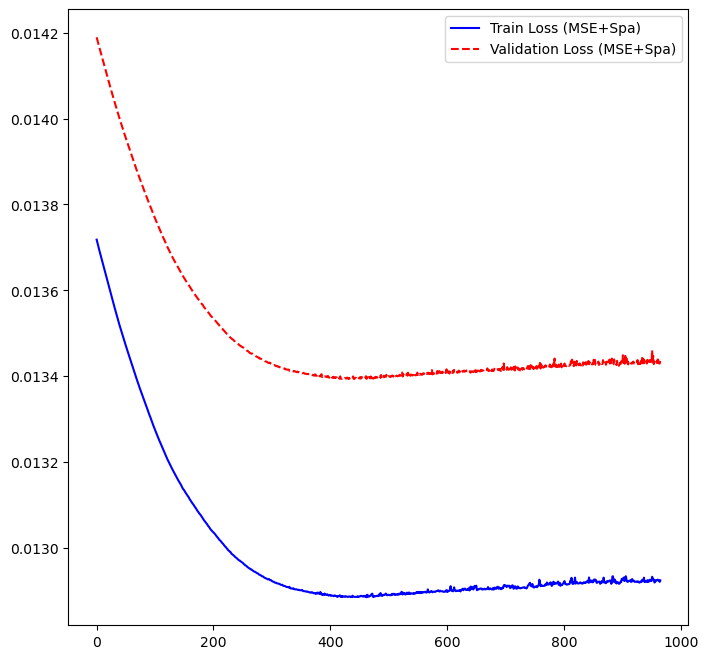

In [ ]:
solver.train()